In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
%matplotlib inline

In [31]:
import os
os.getcwd()
os.chdir('/Users/divyavesangi/Downloads/pratice')
os.getcwd()


'/Users/divyavesangi/Downloads/pratice'

In [41]:
car=pd.read_csv('suv_data.csv')
car.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [42]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [43]:
car.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [44]:
car.duplicated().sum()

0

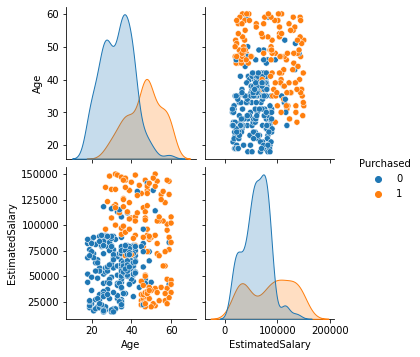

In [45]:
sns.pairplot(car, hue = 'Purchased', vars = ['Age', 'EstimatedSalary'] )

/Users/divyavesangi/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchased', ylabel='count'>

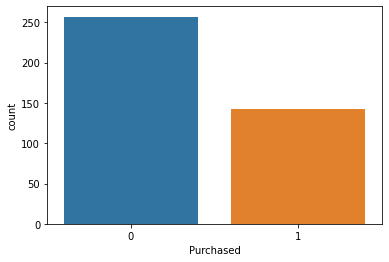

In [46]:
sns.countplot(car['Purchased'])

<AxesSubplot:>

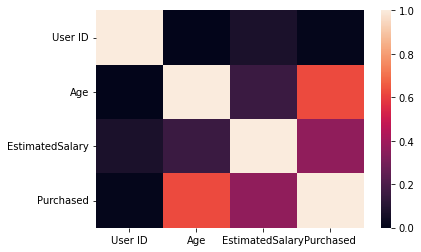

In [47]:
sns.heatmap(car.corr())

In [49]:
car1=car.drop(['Gender','User ID'],axis=1)

In [50]:
car1.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [51]:
x=car1.drop(['Purchased'],axis=1)
y=car1[['Purchased']]

In [52]:
from sklearn.model_selection import train_test_split


In [53]:
X_train, X_test, y_train, y_test = train_test_split(  x, y, test_size=0.30)


In [54]:
from sklearn.svm import SVC 
svc_model = SVC()
svc_model.fit(X_train, y_train)

/Users/divyavesangi/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [56]:
predict = svc_model.predict(X_test)


In [57]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78        68
           1       0.86      0.35      0.49        52

    accuracy                           0.69       120
   macro avg       0.76      0.65      0.64       120
weighted avg       0.74      0.69      0.65       120



In [58]:
print(confusion_matrix(y_test,predict))

[[65  3]
 [34 18]]


In [59]:
min_train = X_train.min()
min_train

Age                   18
EstimatedSalary    15000
dtype: int64

In [60]:
range_train = (X_train - min_train).max()
range_train

Age                    42
EstimatedSalary    135000
dtype: int64

In [63]:
X_train_scaled = (X_train - min_train)/range_train
X_train_scaled

,Age,EstimatedSalary
245,0.785714,0.970370
209,0.666667,0.051852
118,0.523810,0.325926
217,0.523810,0.466667
34,0.214286,0.555556
...,...,...
246,0.404762,0.259259
71,0.142857,0.088889
74,0.333333,0.022222
130,0.309524,0.318519


In [66]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [67]:
from sklearn.svm import SVC 
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

/Users/divyavesangi/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [68]:
predict1 = svc_model.predict(X_test_scaled)


In [71]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        68
           1       0.86      0.81      0.83        52

    accuracy                           0.86       120
   macro avg       0.86      0.85      0.85       120
weighted avg       0.86      0.86      0.86       120



In [72]:
print(confusion_matrix(y_test,predict1))

[[61  7]
 [10 42]]
